# **Imersão Dev - Alura - 01**

In [56]:
import this # Um texto motivacional logo no começo

In [57]:
import pandas as pd # Aqui vão ficar as bibliotecas, para separar adequadamente

In [58]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv") # df é de DataFrame, estamos importando a base

In [59]:
df.head() # aqui estamos abrindo o arquivo, o () vazio traz as 5 primeiras linhas

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [60]:
df.info() # Vai nos trazer algumas informações da tabela, além dos tipos e a quantidade de informações

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [61]:
df.describe() # Pega só as colunas numéricas, traz estatísticas descritivas, pra podermos entender melhor os dados

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [62]:
df.shape # É um atributo, não uma função, traz a quantidade de linhas e o número de colunas respectivamente

(133349, 11)

In [63]:
linhas, colunas = df.shape[0], df.shape[1] # Iremos criar uma tabela para visualização, usaremos as informações trazidas no Shape (linhas e colunas)
print("------------------")
print("|", "Linhas:", linhas, "|")
print("|", "Colunas:", colunas, "   |")
print("------------------")

------------------
| Linhas: 133349 |
| Colunas: 11    |
------------------


In [64]:
df.columns # Vai listar todas as colunas, ainda em inglês

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [65]:
# Criando um dicionário para mapear os nomes das colunas em inglês para português
traducao_colunas = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

# Renomeando as colunas do DataFrame
df = df.rename(columns=traducao_colunas)

# Exibindo os novos nomes das colunas para verificar
print(df.columns)

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')


In [66]:
df["senioridade"].value_counts() # vai calcular a frequência de cada categoria

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [67]:
df["contrato"].value_counts() # Trazendo as informações do tipo

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [68]:
df["remoto"].value_counts() # Trazendo as informações da taxa de home office, 0 - presenciais, 100 - remoto, - híbrido

,count
remoto,
0,105312
100,27718
50,319


In [69]:
df["tamanho_empresa"].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [70]:
# Criando um dicionário para mapear as abreviações de senioridade para português
traducao_senioridade = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}

# Substituindo os valores na coluna 'senioridade'
df['senioridade'] = df['senioridade'].replace(traducao_senioridade)

# Verificando a contagem de valores após a tradução
print(df['senioridade'].value_counts())

senioridade
Senior       77241
Pleno        40465
Junior       12443
Executivo     3200
Name: count, dtype: int64


In [71]:
# Criando um dicionário para mapear as abreviações de contrato para português
traducao_contrato = {
    'FT': 'Integral',
    'CT': 'Contrato',
    'PT': 'Parcial',
    'FL': 'Freelancer'
}

# Substituindo os valores na coluna 'contrato'
df['contrato'] = df['contrato'].replace(traducao_contrato)

# Verificando a contagem de valores após a tradução
print(df['contrato'].value_counts())

contrato
Integral      132563
Contrato         394
Parcial          376
Freelancer        16
Name: count, dtype: int64


In [72]:
# Criando um dicionário para mapear as abreviações de tamanho_empresa para português
traducao_tamanho_empresa = {
    'M': 'Média',
    'L': 'Grande',
    'S': 'Pequena'
}

# Substituindo os valores na coluna 'tamanho_empresa'
df['tamanho_empresa'] = df['tamanho_empresa'].replace(traducao_tamanho_empresa)

# Verificando a contagem de valores após a tradução
print(df['tamanho_empresa'].value_counts())

tamanho_empresa
Média      129561
Grande       3574
Pequena       214
Name: count, dtype: int64


In [73]:
# Criando um dicionário para mapear os valores da coluna 'remoto' para português
traducao_remoto = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
}

# Substituindo os valores na coluna 'remoto'
df['remoto'] = df['remoto'].replace(traducao_remoto)

# Verificando a contagem de valores após a tradução
print(df['remoto'].value_counts())

remoto
Presencial    105312
Remoto         27718
Híbrido          319
Name: count, dtype: int64


In [74]:
df.head() # Agora ela estará bonitinha e com tudo em ordem

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [75]:
df.describe(include="object") # count é a quantidade de valores, unique são os valores únicos, top é a informação mais frequente, freq é o calculo da frequência

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Integral,Data Scientist,USD,US,Presencial,US,Média
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [76]:
df.describe() # A visualização de outra tabela, essa com foco nos valores numéricos

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


#**Imersão Dev - Alura - 02**

In [77]:
df.isnull() # Retonará os valores que serão nulos, | False -> Tem valores | True ->  Não tem valores |

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [78]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [79]:
df.isnull().sum() # Função de somar igual ao do SQL Server

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [81]:
df['ano'].unique() # Os valores únicos dentro dessa coluna, nan é nulo

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [82]:
df[df.isnull().any(axis=1)] # Filtramos todos os anos que estão aparecendo como nan

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Senior,Integral,Product Manager,184500,USD,184500,US,Presencial,US,Média
59692,NaN,Pleno,Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Média
59710,NaN,Junior,Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Média
59759,NaN,Senior,Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Média
59789,NaN,Senior,Integral,Engineer,112000,USD,112000,US,Presencial,US,Média
131000,NaN,Senior,Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Média
131006,NaN,Senior,Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Média
133054,NaN,Junior,Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


# Como completar um DataFrame que tem dados NaN

In [91]:
import numpy as np

# Criação de um DataFrame de teste e substituindo valores nulos
df_salarios = pd.DataFrame({
    "nome": ["Ana", "Bruno", "Carlos", "Daniele", "Val"],
    "salario": [4000, np.nan, 5000, np.nan, 100000], # Aqui estamos adicionando o salário e usando o numpy para inserir elementos nulos
})

# Calculando a média e a mediana e substituindo pelos valores nan
df_salarios["salario_media"] = df_salarios["salario"].fillna(df_salarios["salario"].mean().round(2)) # Aqui preencheremos os nan com a média do salário arrendodado
df_salarios["salario_mediana"] = df_salarios["salario"].fillna(df_salarios["salario"].median()) # Calculando com a Mediana
df_salarios # Resumindo, criamos uma coluna, calculamos a média e inserimos nessa nova coluna o valor

# Note que quando um salário é muito divergente (outlier), a média dos demais também ficará "suja", atrapalhando a visão estratégica

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [92]:
# Criando um novo dataframe de Tempo
df_temperatura = pd.DataFrame({
    "Dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    "Temperatura": [30, np.nan, np.nan, 28, 27]
})

# Criando uma nova coluna e preenchendo com o valor anterior (FowardFill)
df_temperatura["Preenchido_ffill"] = df_temperatura["Temperatura"].ffill()
df_temperatura

,Dia,Temperatura,Preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [93]:
# Criando um novo dataframe de Tempo
df_temperatura = pd.DataFrame({
    "Dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    "Temperatura": [30, np.nan, np.nan, 28, 27]
})

# Criando uma nova coluna e preenchendo com o valor anterior (BackFill)
df_temperatura["Preenchido_bfill"] = df_temperatura["Temperatura"].bfill()
df_temperatura

,Dia,Temperatura,Preenchido_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [99]:
# Método -> ()
# DataFrame/Base de Dados -> {}
# Acessando coluna -> []

# Criando um novo DataFrame
df_cidades = pd.DataFrame({
    "Nome": ["Ana", "Bruno", "Carlos", "Daniele", "Val"],
    "Cidade": ["São Paulo", np.nan, "Curitiba", np.nan, "Belém"]
})

# Preenchendo o que era nulo com algo de nossa escolha
df_cidades["cidade_preenchida"] = df_cidades["Cidade"].fillna("Não Informado")
df_cidades

,Nome,Cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não Informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não Informado
4,Val,Belém,Belém


In [100]:
df_limpo = df.dropna() # Aqui estamos atribuindo a um novo dataframe os valores do DF original e "dropando" os NaN

In [101]:
df_limpo.isnull().sum() # Aqui estamos confirmando que os dados estão de fato limpos

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [102]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [103]:
df_limpo.info()

# A variável ano é do tipo FLOAT, por isso a vírgula, então converteremos ele

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [108]:
# Aqui estamos substituindo a coluna ano, dizendo que ela recebe o ano dela mesma mas que seu tipo será INT

df_limpo = df_limpo.assign(ano = df_limpo["ano"].astype("int64"))
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              133339 non-null  int64 
 1   senioridade      133339 non-null  object
 2   contrato         133339 non-null  object
 3   cargo            133339 non-null  object
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  object
 6   usd              133339 non-null  int64 
 7   residencia       133339 non-null  object
 8   remoto           133339 non-null  object
 9   empresa          133339 non-null  object
 10  tamanho_empresa  133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


#**Imersão Dev - Alura - 03**

In [109]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

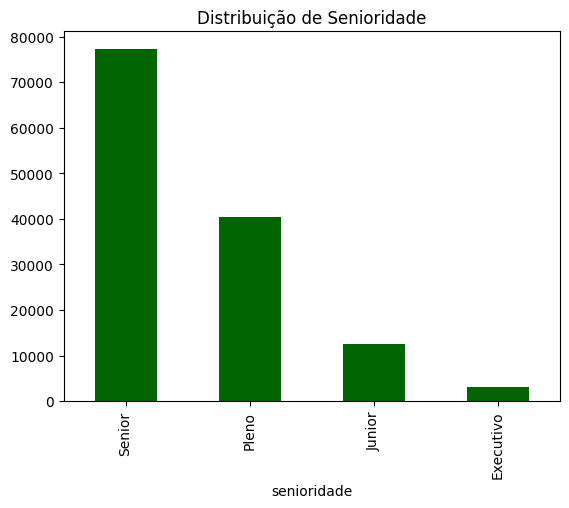

In [118]:
# Criando um gráfico visual com o Pandas, o 'plot' está se referindo a tabela, queremos "plotar" as informação do DataFrame

df_limpo['senioridade'].value_counts().plot(kind='bar', title='Distribuição de Senioridade', color='darkgreen')

In [121]:
import seaborn as sns # Importando bibliotecas que podem fazer tabelas mais complexas
import matplotlib.pyplot as plt

<Axes: xlabel='senioridade', ylabel='usd'>

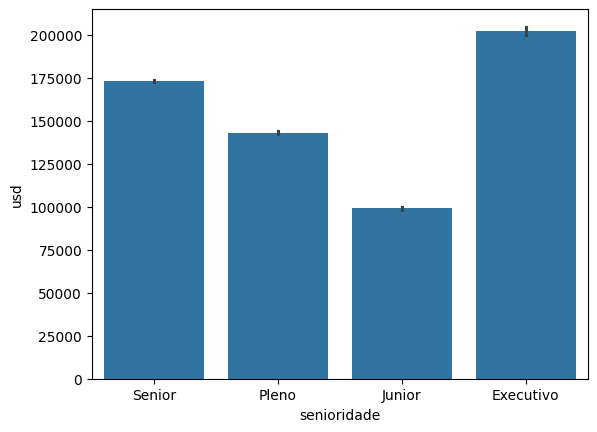

In [120]:
sns.barplot(data=df_limpo, x='senioridade', y='usd') # Aparece com texto em cima pois não utilizamos a função 'Show'

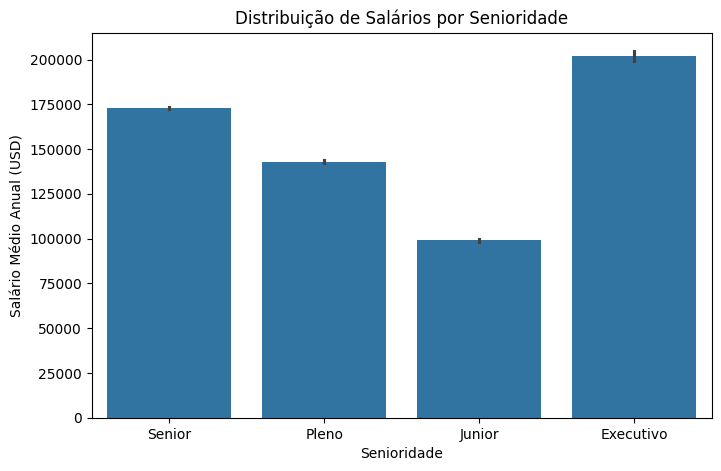

In [122]:
plt.figure(figsize=(8, 5)) # Determinando o tamanho da figura
sns.barplot(data=df_limpo, x='senioridade', y='usd')
plt.title("Distribuição de Salários por Senioridade")
plt.xlabel('Senioridade')
plt.ylabel('Salário Médio Anual (USD)')
plt.show()

In [140]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

,usd
senioridade,
Executivo,202027.667813
Senior,172850.838301
Pleno,143044.845979
Junior,99034.963267


In [141]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index

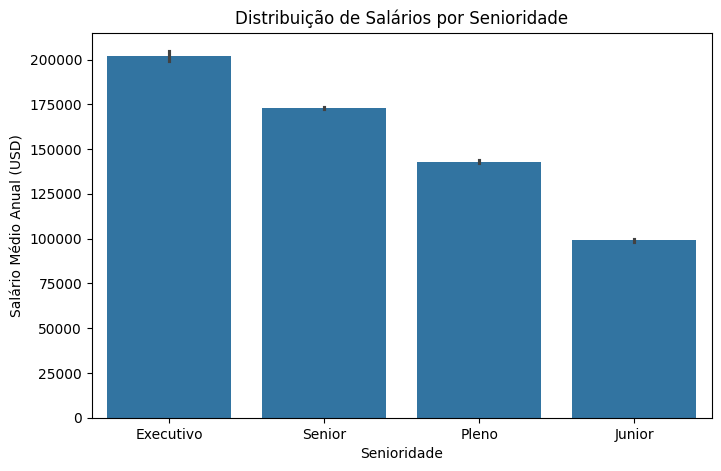

In [142]:
plt.figure(figsize=(8, 5)) # Determinando o tamanho da figura
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem)
plt.title("Distribuição de Salários por Senioridade")
plt.xlabel('Senioridade')
plt.ylabel('Salário Médio Anual (USD)')
plt.show()

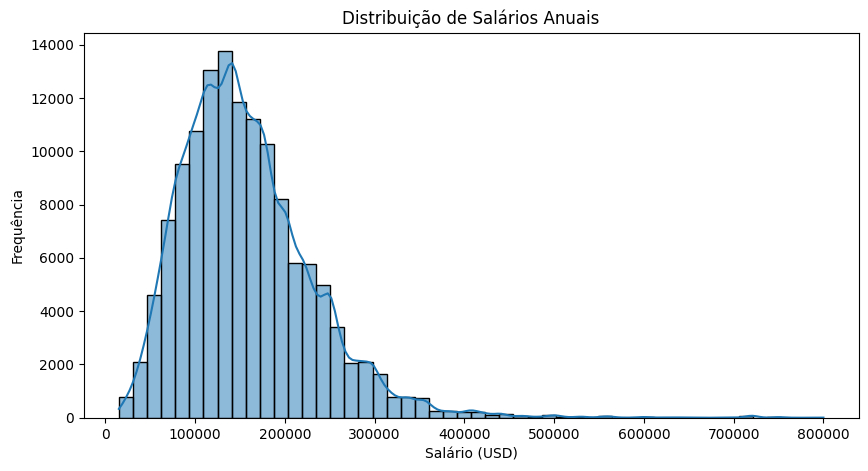

In [154]:
plt.figure(figsize=(10, 5))
sns.histplot(df_limpo['usd'], bins=50, kde=True) # bins é a largura das barras que estão aparecendo, kde é a linha azul
plt.title("Distribuição de Salários Anuais")
plt.xlabel('Salário (USD)')
plt.ylabel('Frequência')
plt.show()

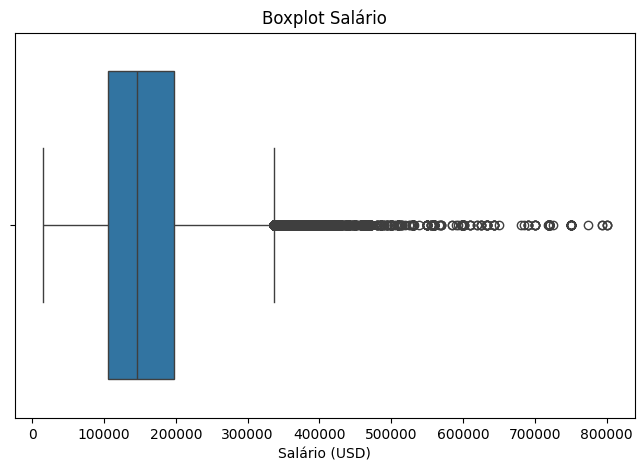

In [156]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo['usd'])
plt.title("Boxplot Salário")
plt.xlabel('Salário (USD)')
plt.show()

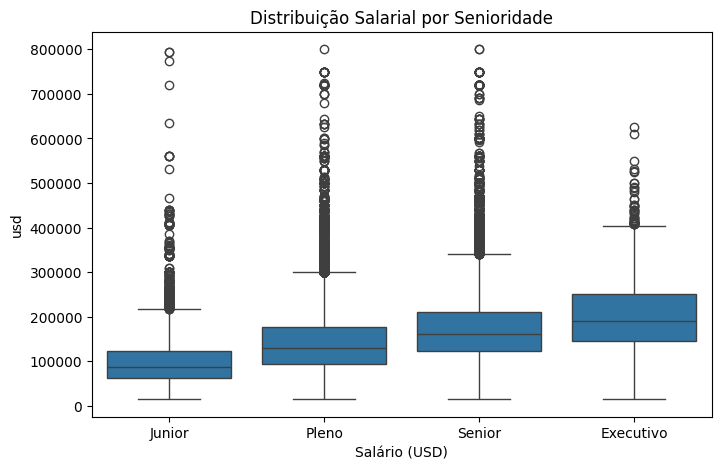

In [158]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']
plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade)
plt.title("Distribuição Salarial por Senioridade")
plt.xlabel('Salário (USD)')
plt.show()

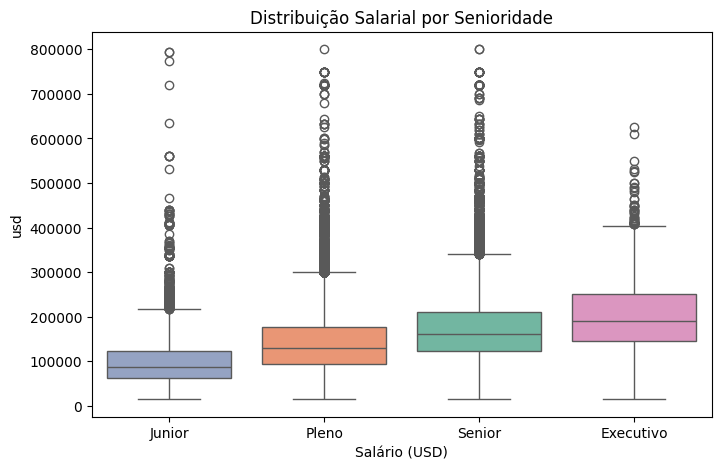

In [159]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']
plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title("Distribuição Salarial por Senioridade")
plt.xlabel('Salário (USD)')
plt.show()

In [160]:
import plotly.express as px # É uma biblioteca para gráficos interativos

In [161]:
# Calcular a média salarial por senioridade
media_salario_senioridade = df_limpo.groupby('senioridade')['usd'].mean().reset_index()

# Definir a ordem correta das barras
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']
media_salario_senioridade['senioridade'] = pd.Categorical(media_salario_senioridade['senioridade'], categories=ordem_senioridade, ordered=True)
media_salario_senioridade = media_salario_senioridade.sort_values('senioridade')

# Criar o gráfico de barras interativo com Plotly Express
fig = px.bar(media_salario_senioridade,
             x='senioridade',
             y='usd',
             title='Média Salarial por Senioridade',
             labels={'senioridade': 'Senioridade', 'usd': 'Média Salarial Anual (USD)'})

fig.show()

In [164]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção das modalidades de trabalho',
             hole=0.5)

fig.update_traces(textinfo='percent+label')
fig.show()

In [170]:
# Desafio - Criando um gráfico do salário de Data Scientists por país (como eu tentei fazer)

# Filtrar o DataFrame para incluir apenas Data Scientists
df_data_scientists = df_limpo[df_limpo['cargo'] == 'Data Scientist'].copy()

# Calcular o salário médio por país para Data Scientists
salario_por_pais_ds = df_data_scientists.groupby('residencia')['usd'].mean().reset_index()

# Ordenar por salário médio e selecionar os top 10 países
salario_por_pais_ds = salario_por_pais_ds.sort_values(by='usd', ascending=False).head(5)

# Criar o gráfico de pizza interativo com Plotly Express
fig = px.pie(salario_por_pais_ds,
             names='residencia',
             values='usd',
             title='Top 05 Salários Médios de Data Scientists por País',
             hole=0.5) # Adicionado hole para fazer um gráfico de rosca

fig.update_traces(textinfo='percent+label')
fig.show()

# **Imersão Dev - Alura - 04**

In [172]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [173]:
pip install pycountry # Instalaremos essa biblioteca para podermos deixar a localidade da residência de uma melhor maneira

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 94.2 MB/s eta 0:00:00


In [174]:
# Desafio da Aula 04 Resolvido

import pycountry

# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()

In [175]:
df_limpo.head() # Vamos visualizar a nova coluna criada

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,residencia_iso3
0,2025,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média,USA
1,2025,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média,USA
2,2025,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média,AUS
3,2025,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média,AUS
4,2025,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média,USA


In [176]:
df_limpo.to_csv('dados-imersao-final.csv', index=False)